In [6]:
import pstats

In [7]:
# initial profiling
p_init = pstats.Stats('init_collision.prof')
# p_init.strip_dirs().sort_stats('time').print_stats(50)

Simulation ended.
Collision probability: 0.9999999999999942.
Reward: -5994.399999999965.


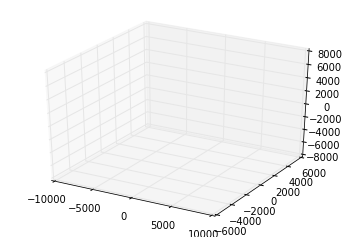

In [14]:
%run -m cProfile -o collision.prof collision.py

In [15]:
# profiling after numpy
p = pstats.Stats('collision.prof')
p.strip_dirs().sort_stats('time').print_stats(5)

Wed Jan 24 15:20:43 2018    collision.prof

         30700550 function calls (30693965 primitive calls) in 34.837 seconds

   Ordered by: internal time
   List reduced from 920 to 5 due to restriction <5>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   270054    7.666    0.000   25.120    0.000 _distn_infrastructure.py:1709(cdf)
   540108    2.911    0.000    3.793    0.000 numerictypes.py:942(_can_coerce_all)
  2797552    2.529    0.000    2.529    0.000 {built-in method numpy.core.multiarray.array}
   452393    1.422    0.000    1.422    0.000 {method 'reduce' of 'numpy.ufunc' objects}
    90018    1.317    0.000   26.777    0.000 api.py:105(coll_prob_estimation)




In [16]:
print("init time:", p_init.total_tt)
print("new time:", p.total_tt)
print("time difference:", p_init.total_tt - p.total_tt)

init time: 37.6402369999996
new time: 34.83674599999996
time difference: 2.8034909999996387


### Comments:

* "cdf" will go away with replacement "normal" approach by "Hutor" one. So we reduce time approximately by half.
* we could gain some time by optional exceptions using in api, like this:
    ```
    if excetions == True:
        test_sth
    ```
  end disable testing during ML.